# <img style="float: left; padding-right: 10px; width: 200px" src="https://fligoo.com/img/logo-large.png"> Fligoo - Credit Risk (Cont.)

Tech Interview for Data Scientist

<hr style="height:2pt">

## Motivation

Credit risk is most simply defined as the potential that a bank borrower or counterparty will fail to meet its obligations in accordance with agreed terms. The goal of credit risk management is to maximise a bank's risk-adjusted rate of return by maintaining credit risk exposure within acceptable parameters. Banks need to manage the credit risk inherent in the entire portfolio as well as the risk in individual credits or transactions. 

## Description

The following dataset has 150.000 records of borrowers taken from an anonymous bank, which are described through 12 different columns.

The goal of this test is to perform an Exploratory Data Analysis (EDA) on this dataset, to understand the information contained and obtain insights that could be relevant to solve a business problem and develop a simple model that could predict the risk.

You can find the data in this [link](https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/CreditEDA/data/credit-data.csv)

Below is a description of the involved columns:

| Variable Name | Description | 
| ------------- | ----------- |
| unnamed:0 | ID of borrower |
| serious_dlqin2yrs | Person experienced 90 days past due delinquency or worse |
| revolving_utilization_of_unsecured_lines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits |
| age | Age of borrower in years | 
| number_of_time30-59_days_past_due_not_worse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years |
| debt_ratio | Monthly debt payments, alimony, living costs divided by monthy gross income |
| monthly_income | Monthly income |
| number_of_open_credit_lines_and_loans | Number of open loans (installment like car loan or mortgage) and lines of credit (e.g. credit cards) |
| number_of_times90_days_late | Number of times borrower has been 90 days or more past due |
| number_real_estate_loans_or_lines | Number of mortgage and real estate loans including home equity lines of credit |
| number_of_time60-89_days_past_due_not_worse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years |
| number_of_dependents | Number of dependents in family excluding themselves (spouse, children etc.) |


Please **read carefully** all the assignments to guide the work that is expected to find in this notebook.

## Goal

In this notebook you have to load all the libraries you need to explore and process the given dataset, and then perform the analysis to extract meaningful facts in order to understand the information involved. You are free to make any kind of analytic you want, but at the end it is expected to have done the "mandatory" tasks on this work. In addition, there are some "nice to have" aspects that would enrich the work done.

> Please provide reports in English and focus on findings and insights

**Stack of technologies:** The analysis on this notebook should be done by using at least the following stack:   
    - Python 3.x (not 2.x)
    - Pandas 1.0.x

### Assignment

- **Report insights and conclusions:** Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by charts / tables / metrics. 
- **Data Quality Check:** You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data.     
   
- **Feature extraction:** Indicate some possible candidates of features that could properly describe the borrowers, either from the given columns or from their transformations.
- **Machine Learning modeling:** at least one fitted model with the given data. You could use the `serious_dlqin2yrs` column as target.


### Nice to have aspects

- Dockerfile to setup environment.
- Identify features and new attributes / tables that could be relevant or needed for better analysis
- **Code versioning with Git** (you are free to publish it on your own Github/Bitbucket account!).
- **Show proficiency in Python:** By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- **Use cases:** Describe possible use cases for this dataset that could add value to the given business, indicating methods / techniques and algorithms for each of them and justifying the choice made.
- **Machine Learning approaches:** Describe the possible Machine Learning tasks that could be performed from the given data, which may be valuable in the context of the finance domain (just explain with words, don't fit a model).

Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) to esteban.delboca@fligoo.com. Then you are going to have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.

**Have fun!**

![Have fun](https://media1.tenor.com/images/8d13f337a8c6e5aab8ba1bd8acd4da0c/tenor.gif?itemid=5304821)

## Tech Interview - Yanina Vanesa Iberra (Part II)

- **Reading the CSV data file using pandas** <br> <br>
File separated by comma, de default read_csv function delimiter is comma, therefore, this parameter is omitted.

In [1]:
# Command that will allow to see a graphic in this notebook below the line of code that invokes it.
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import ancillary_functions

In [3]:
borrowers_clean = pd.read_csv('credit-data-clean.csv').drop('Unnamed: 0', axis = 1)

First of all, let's check again that we eliminated all the missing values.

In [4]:
print(f"Missing values in each attribute: \n{borrowers_clean.isnull().sum()}")

Missing values in each attribute: 
serious_dlqin2yrs                               0
revolving_utilization_of_unsecured_lines        0
age                                             0
number_of_time30-59_days_past_due_not_worse     0
debt_ratio                                      0
monthly_income                                  0
number_of_open_credit_lines_and_loans           0
number_of_times90_days_late                     0
number_real_estate_loans_or_lines               0
number_of_time60-89_days_past_due_not_worse     0
number_of_dependents                            0
monthly_income_bin                              0
age_bin                                         0
number_of_dependents_bin                        0
debt_ratio_bin                                  0
revolving_utilization_of_unsecured_lines_bin    0
dtype: int64


In [5]:
borrowers_clean.shape

(144002, 16)

In [6]:
borrowers_clean.describe()

,serious_dlqin2yrs,revolving_utilization_of_unsecured_lines,age,number_of_time30-59_days_past_due_not_worse,debt_ratio,monthly_income,number_of_open_credit_lines_and_loans,number_of_times90_days_late,number_real_estate_loans_or_lines,number_of_time60-89_days_past_due_not_worse,number_of_dependents,monthly_income_bin,age_bin,number_of_dependents_bin
count,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.000000,144002.00000,144002.000000,144002.00000
mean,0.055513,0.306822,52.417265,0.197386,0.587765,5916.060194,8.384002,0.055721,0.989639,0.036583,0.711421,1.99691,1.962146,1.99691
std,0.228980,0.342485,14.864221,0.603216,0.568135,3181.598307,5.027205,0.364356,1.026522,0.231229,1.076267,1.41236,1.425713,1.41236
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,0.000000,0.028517,41.000000,0.000000,0.172178,3885.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,1.00000
50%,0.000000,0.143765,52.000000,0.000000,0.361035,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000,2.00000,2.000000,2.00000
75%,0.000000,0.525590,63.000000,0.000000,0.811547,7350.000000,11.000000,0.000000,2.000000,0.000000,1.000000,3.00000,3.000000,3.00000
max,1.000000,0.999990,109.000000,13.000000,1.604698,14145.000000,57.000000,17.000000,25.000000,11.000000,10.000000,4.00000,4.000000,4.00000


### 4. Machine Learning Model

In [7]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(['revolving_utilization_of_unsecured_lines',
                     'age', 'number_of_time30-59_days_past_due_not_worse',
                     'debt_ratio', 'monthly_income','number_of_open_credit_lines_and_loans', 
                     'number_of_times90_days_late', 'number_real_estate_loans_or_lines',
                     'number_of_time60-89_days_past_due_not_worse', 'number_of_dependents'])
clf = RandomForestClassifier()
clf.fit(borrowers_clean[features], borrowers_clean['serious_dlqin2yrs'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Importances** <br>
Your RandomForest does a really good job of finding the best features, or variables, in your dataset for predicting whatever it is you're trying to predict. Pretty handy, right? What happens is that since your RandomForest has built so many random decision trees, it winds up with a pretty good idea for what variables tend to be working best. You can use this to generate a rank ordered list of the best features in your dataset.

In [8]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

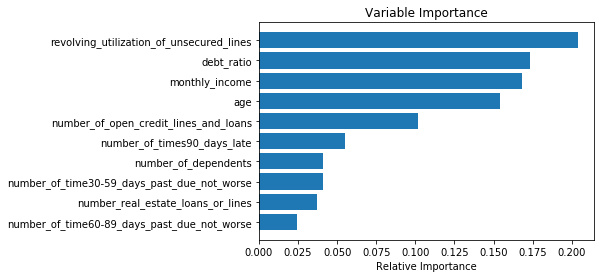

In [9]:
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

**Interpretting the results** <BR>
So you can see that the best variable is `revolving_utilization_of_unsecured_lines` while the worst is `number_of_time60-89_days_past_due_not_worse`. There's also a dramatic drop off after number_of_open_credit_lines_and_loans. <br>
We have to decide which variables to include in our model.

#### Target (y) and variables (X) selection

Using the variable `serious_dlqin2yrs` as a target.

Remove those variables that I do not want to include in the model and save them in `x` variable.
(Agrego las variables categorizadas, porque da error al entrenar el modelo)
ValueError: could not convert string to float: 'Good'

In [11]:
x = borrowers_clean.drop(['serious_dlqin2yrs', 'number_of_times90_days_late', 'number_of_dependents', 'number_of_time30-59_days_past_due_not_worse', 'number_real_estate_loans_or_lines', 'number_of_time60-89_days_past_due_not_worse', 'monthly_income_bin', 'age_bin', 'debt_ratio_bin', 'revolving_utilization_of_unsecured_lines_bin', 'number_of_dependents_bin'], 
                  axis=1)

In [12]:
lista_atributos = x.columns
lista_atributos

Index(['revolving_utilization_of_unsecured_lines', 'age', 'debt_ratio',
       'monthly_income', 'number_of_open_credit_lines_and_loans'],
      dtype='object')

In [14]:
# Select the labels and save them under 'y'.
y = borrowers_clean['serious_dlqin2yrs']

In [15]:
x, y = np.array(x), np.array(y)

#### Separating dataset in Train / Test sets

The way the data is normally divided is 80% training and 20% evaluation.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, 
                                                    random_state = 42) #numpy.ndarray

In [18]:
len(y_train) # Total values in train set

115201

In [19]:
np.count_nonzero(y_train) # Target = 1 in train set

6352

In [20]:
len(y_train) - np.count_nonzero(y_train) # Target = 0 in train set

108849

In [21]:
len(y_test) # Total values in test set

28801

In [22]:
np.count_nonzero(y_test) # Target = 1 in test set

1642

In [23]:
len(y_test) - np.count_nonzero(y_test) # Target = 0 in test set

27159

#### kNN classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
# Metrics
from sklearn.metrics import (
    roc_curve, 
    accuracy_score, 
    roc_auc_score,
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score
)

In [26]:
knn = KNeighborsClassifier()

In [27]:
# Train the model
knn.fit(X_train, y_train); 

In [28]:
# Predict 
predicciones_cla = knn.predict(X_test)

In [29]:
predicciones_train = knn.predict(X_train)

In [30]:
accuracy = accuracy_score(y_train, predicciones_train)*100
print(f'{round(accuracy, 2)}%')

94.59%


In [31]:
accuracy = accuracy_score(y_test, predicciones_cla)*100
print(f'{round(accuracy, 2)}%')

94.07%


**Model optimization**

In [32]:
# This step takes time.
ACC_train = []
ACC_test = []
vecinos = [1, 3, 5, 10, 15, 20, 25, 30]
for n in vecinos: # I train different models with different neighbors
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    ACC_train.append(train_acc)
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    ACC_test.append(test_acc)

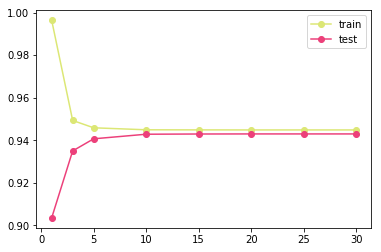

In [33]:
plt.plot(vecinos,ACC_train,'o-',label='train', color='#DCE775')
plt.plot(vecinos,ACC_test,'o-',label='test', color='#EC407A')
plt.legend()

In [34]:
# Values for the parameters to be optimized
param_grid_vec = {
    'n_neighbors': [8, 10, 12], # Search for neighbors close to 10, to see if they can be further optimized
    'weights': ['uniform','distance'],
    'metric': ['euclidean', 'manhattan'],
}

In [35]:
knn_search = KNeighborsClassifier()

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
vecinos_search = GridSearchCV(estimator=knn_search, param_grid=param_grid_vec,
                         cv=3, verbose=2, n_jobs=-1)

In [38]:
vecinos_search.fit(X_train, y_train) # This step takes time.

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   39.1s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': [8, 10, 12], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

What is our best estimator?

In [39]:
vecinos_search.best_estimator_ 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

Best metric is 'manhattan', with weights 'distance'and n_neighbors=12

In [40]:
vecinos_search.best_score_

0.9448008263817155

In [41]:
knn_best = vecinos_search.best_estimator_

In [42]:
knn_best.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=12, p=2,
           weights='uniform')

In [43]:
new_predictions = knn_best.predict(X_test)

In [44]:
# Error
ancillary_functions.evaluation(y_test, new_predictions)

El error absoluto medio para el modelo es 0.06
El error porcentual absoluto medio para el modelo es nan


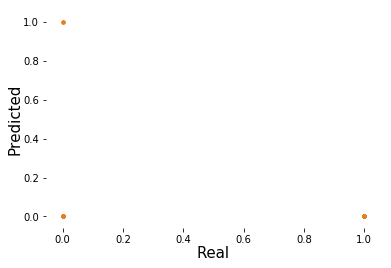

In [45]:
# Correlation
ancillary_functions.graph_real_pred(y_test, new_predictions, color='#E67E22') # no line, no good correlation

**Metrics** 

Confusion matrix:

True Negative (TN)  |  False positive (FP)   
= = = = = = = = = = = = = = = = = = = = =       
False negative (FN) | True positive (TP)  


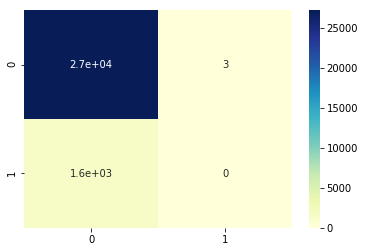

In [46]:
plt.figure()
random_confusion = confusion_matrix(y_test, new_predictions)
sns.heatmap(random_confusion, cmap="YlGnBu",annot=True); #The resulting values do not appear to be correct

In [47]:
print(f"Accuracy: {accuracy_score(y_test, new_predictions)*100 :.2f}%")
print(f"Precision: {precision_score(y_test, new_predictions)*100 :.2f}%")
print(f"Recall: {recall_score(y_test, new_predictions)*100 :.2f}%")
print(f"F1 score: {f1_score(y_test, new_predictions)*100 :.2f}%")

Accuracy: 94.29%
Precision: 0.00%
Recall: 0.00%
F1 score: 0.00%


#### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

Initialize the model.

In [49]:
regresor = RandomForestRegressor(criterion='mae', random_state = 42)

Train the model

In [ ]:
regresor.fit(X_train, y_train); # This step takes time.

In [ ]:
regresor.get_params()

#### Model evaluation

We use a regression algorithm, so we will use the errors to be able to evaluate the performance of our model. First, we will create some functions that will allow us to obtain the errors easily and to graph the results.<br>
Let's evaluate the model. First, we make predictions for the evaluation set and then we compare it with the actual values. <br>
Predicting the values for the test set.

In [ ]:
y_pred = regresor.predict(X_test)

Calculate the mean absolute error.

In [ ]:
mean_absolute_error(y_test, y_pred)

Calculate the average percentage error.

In [ ]:
np.mean((np.abs(y_test - y_pred)/y_test)*100)

Predict the values for the training set.

In [ ]:
y_pred_train = regresor.predict(X_train)

In [ ]:
mean_absolute_error(y_train, y_pred_train)

Calculate the mean percentage error for training.

In [ ]:
np.mean((np.abs(y_train - y_pred_train)/y_train)*100)

Get the importance of each feature using `feature_importances_`.

In [ ]:
for x, y in list(zip(lista_atributos,regresor.feature_importances_)):
    print(f'Atributo: {x}, Importancia: {y}') 

**Observations:**
- Check which steps are wrong, because the Random Forest algorithm gives me zero values.
- Try another agorithm, in this case the  k-Nearest Neighbor.